Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable.

In predicting the price of a home, one factor to consider is the size of the home. The relationship between those two variables, price and size, is important, but there are other variables that factor in to pricing a home: location, air quality, demographics, parking, and more. When making predictions for price, our dependent variable, we will want to use multiple independent variables. To do this, we will use Multiple Linear Regression.

StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem. In this lesson, we will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

Here, we will be working with the borough - Brooklyn.

Dataset link: https://github.com/Codecademy/datasets/tree/master/streeteasy

In [1]:
import pandas as pd

<h3>Data</h3>

In [2]:
df = pd.read_csv('brooklyn.csv')

In [3]:
df.head(10)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn
3,24,4900,1.0,1,1216,6,3.0,88,0,0,0,0,0,0,0,0,Brooklyn Heights,Brooklyn
4,9481,3900,0.0,1,1100,3,4.0,85,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
5,849,2750,1.0,1,700,12,3.0,9,1,0,0,0,0,0,0,0,Clinton Hill,Brooklyn
6,6029,2700,2.0,1,750,7,14.0,96,0,0,0,0,0,0,0,0,Williamsburg,Brooklyn
7,3686,4905,2.0,2,1114,6,5.0,2,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
8,7616,2000,1.0,1,700,4,2.0,85,0,0,0,0,0,0,0,0,Williamsburg,Brooklyn
9,863,3200,1.0,1,800,5,3.0,27,0,0,0,0,0,0,0,0,Boerum Hill,Brooklyn


In [4]:
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.00000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,5948.951629,3327.403751,1.578973,1.234946,899.414610,4.721619,6.206318,55.730503,0.515301,0.06614,0.076012,0.103653,0.120434,0.089832,0.021718,0.076012
std,3146.852489,1602.395143,0.973555,0.474740,355.094481,3.285117,9.051340,44.330543,0.500013,0.24865,0.265148,0.304960,0.325630,0.286082,0.145832,0.265148
min,24.000000,1275.000000,0.000000,0.000000,250.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3375.000000,2400.000000,1.000000,1.000000,680.000000,2.000000,2.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6144.000000,3000.000000,2.000000,1.000000,845.000000,4.000000,3.000000,77.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8676.000000,3850.000000,2.000000,1.000000,1000.000000,7.000000,6.000000,96.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11343.000000,18000.000000,5.000000,4.000000,3243.000000,43.000000,68.000000,174.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Selecting and Splitting the Data</h3>

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher','has_patio','has_gym']]

In [7]:
y = df[['rent']]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 6)

In [9]:
x_train.shape, y_train.shape

((810, 14), (810, 1))

In [10]:
x_test.shape, y_test.shape

((203, 14), (203, 1))

We have 14 features that we’re looking for for each apartment, and 1 label we’re looking for for each apartment.

<h3>Building the Model</h3>

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
mlr = LinearRegression()

In [13]:
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_predict = mlr.predict(x_test)

<h3>Testing the Model</h3>

Testing it on: Sonny's apartment (https://streeteasy.com/rental/2177438) to see if the rent paid is overpaid or underpaid.

In [15]:
sonny = [[1, 1, 620, 16, 1, 100, 1, 0, 1, 0, 0, 1, 1, 0]]

In [16]:
predict = mlr.predict(sonny)
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2051.74


And Sonny is only paying $2,000. 

<h3>Visualizing Results with Matplotlib</h3>

In [17]:
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Parnashri\Anaconda_3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Text(0, 0.5, 'predicted rent prices')

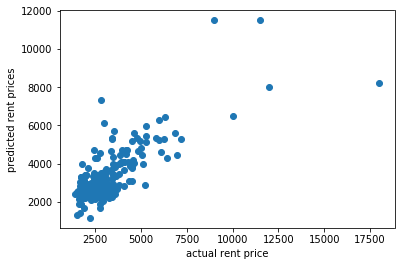

In [18]:
plt.scatter(y_test, y_predict)
plt.xlabel('actual rent price')
plt.ylabel('predicted rent prices')

<h3>Printing Coefficients</h3>

Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.

In [19]:
list(zip(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher','has_patio','has_gym'],mlr.coef_[0]))

[('bedrooms', -196.67177624971518),
 ('bathrooms', 785.4007337748885),
 ('size_sqft', 2.945791480152565),
 ('min_to_subway', -37.786906833183345),
 ('floor', 13.017848924008382),
 ('building_age_yrs', -4.100924230062982),
 ('no_fee', 123.08950599605471),
 ('has_roofdeck', 99.61520874490097),
 ('has_washer_dryer', -14.556290618253694),
 ('has_doorman', -330.2681647061601),
 ('has_elevator', 85.07118066895364),
 ('has_dishwasher', -11.786669272158191),
 ('has_patio', 260.68383056454337),
 ('has_gym', 396.2479384241674)]

<h3>Correlations</h3>

In regression, the independent variables will either have a positive linear relationship to the dependent variable, a negative linear relationship, or no relationship. A negative linear relationship means that as X values increase, Y values will decrease. Similarly, a positive linear relationship means that as X values increase, Y values will also increase.

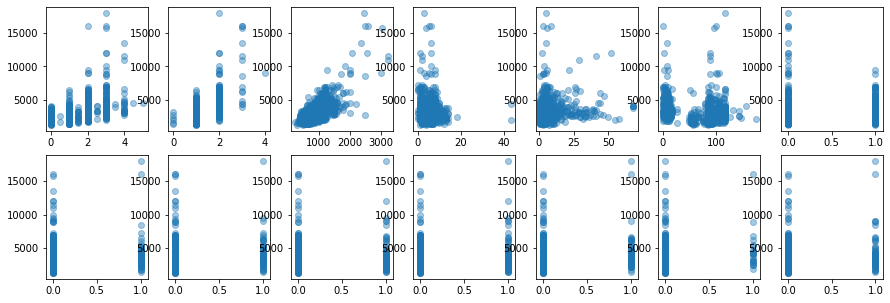

In [20]:
plt.figure(figsize=(15,5))    
plt.subplot(2,7,1)
plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)
plt.subplot(2,7,2)
plt.scatter(df[['bathrooms']], df[['rent']], alpha=0.4)
plt.subplot(2,7,3)
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.subplot(2,7,4)
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.subplot(2,7,5)
plt.scatter(df[['floor']], df[['rent']], alpha=0.4)
plt.subplot(2,7,6)
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.subplot(2,7,7)
plt.scatter(df[['no_fee']], df[['rent']], alpha=0.4)
plt.subplot(2,7,8)
plt.scatter(df[['has_roofdeck']], df[['rent']], alpha=0.4)
plt.subplot(2,7,9)
plt.scatter(df[['has_washer_dryer']], df[['rent']], alpha=0.4)
plt.subplot(2,7,10)
plt.scatter(df[['has_doorman']], df[['rent']], alpha=0.4)
plt.subplot(2,7,11)
plt.scatter(df[['has_elevator']], df[['rent']], alpha=0.4)
plt.subplot(2,7,12)
plt.scatter(df[['has_dishwasher']], df[['rent']], alpha=0.4)
plt.subplot(2,7,13)
plt.scatter(df[['has_patio']], df[['rent']], alpha=0.4)
plt.subplot(2,7,14)
plt.scatter(df[['has_gym']], df[['rent']], alpha=0.4)

<h3>Evaluating Accuracy</h3>

In [21]:
mlr.score(x_train, y_train)

0.6132214537979526

In [22]:
mlr.score(x_test, y_test)

0.5843499238725711

This model can be further improved by removing features and checking for accuracy.